# Notebook Contains Sections like:-
1.Importing Libraries

2.Importing Files

3.Merging Data

4.EDA

5.Checking Missing values

6.Handling Missing Values

7.converting Non-numeric values to Numeric

8.Checking correlation

9.KMeans

10.Customer Segmentation using RFM techniques
    

## Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
import sklearn

## Importing Files

In [2]:
items=pd.read_csv("C:/Users/lenovo/Desktop/Ecommerce BI/order_items_dataset.csv",encoding = 'ISO-8859-1')

In [3]:
geolocation=pd.read_csv("C:/Users/lenovo/Desktop/Ecommerce BI/geolocation_dataset.csv",encoding = 'ISO-8859-1')

In [4]:
payments=pd.read_csv("C:/Users/lenovo/Desktop/Ecommerce BI/order_payments_dataset.csv",encoding = 'ISO-8859-1')

In [5]:
reviews=pd.read_csv("C:/Users/lenovo/Desktop/Ecommerce BI/order_reviews_dataset.csv",encoding = 'ISO-8859-1')

In [6]:
orders=pd.read_csv("C:/Users/lenovo/Desktop/Ecommerce BI/orders_dataset.csv",encoding = 'ISO-8859-1')

In [7]:
customers=pd.read_excel("C:/Users/lenovo/Desktop/Ecommerce BI/customers_dataset1.xlsx")

In [8]:
products=pd.read_csv("C:/Users/lenovo/Desktop/Ecommerce BI/products_dataset.csv",encoding = 'ISO-8859-1')

In [9]:
sellers=pd.read_csv("C:/Users/lenovo/Desktop/Ecommerce BI/sellers_dataset.csv",encoding = 'ISO-8859-1')

In [10]:
categories=pd.read_csv("C:/Users/lenovo/Desktop/Ecommerce BI/product_category_name_translation.csv",encoding = 'ISO-8859-1')

In [11]:
items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-2018 14:48,199.0,17.87


In [12]:
geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


In [13]:
payments.head(3)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71


In [14]:
reviews.head(3)

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18-01-2018 00:00,18-01-2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10-03-2018 00:00,11-03-2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17-02-2018 00:00,18-02-2018 14:36


In [15]:
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [16]:
categories.head(3)

,ï»¿product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


In [17]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [18]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,02-10-2017 10:56,02-10-2017 11:07,04-10-2017 19:55,10-10-2017 21:25,18-10-2017 00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,24-07-2018 20:41,26-07-2018 03:24,26-07-2018 14:31,07-08-2018 15:27,13-08-2018 00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,08-08-2018 08:38,08-08-2018 08:55,08-08-2018 13:50,17-08-2018 18:06,04-09-2018 00:00


In [19]:
customers.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [20]:
categories.rename(columns={'ï»¿product_category_name':'product_category_name'},inplace=True)#Renaming column

In [21]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [22]:
categories.head(3)

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto


## Merging

In [23]:
Merge1=items.merge(payments,on='order_id',how='left')
Merge1.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.9,13.29,1.0,credit_card,2.0,72.19
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,239.9,19.93,1.0,credit_card,3.0,259.83
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-2018 14:48,199.0,17.87,1.0,credit_card,5.0,216.87


In [24]:
Merge2=Merge1.merge(reviews,on='order_id',how='left')
Merge2.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.9,13.29,1.0,credit_card,2.0,72.19,97ca439bc427b48bc1cd7177abe71365,5,NaN,"Perfeito, produto entregue antes do combinado.",21-09-2017 00:00,22-09-2017 10:57
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,239.9,19.93,1.0,credit_card,3.0,259.83,7b07bacd811c4117b742569b04ce3580,4,NaN,NaN,13-05-2017 00:00,15-05-2017 11:34
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-2018 14:48,199.0,17.87,1.0,credit_card,5.0,216.87,0c5b33dea94867d1ac402749e5438e8b,5,NaN,Chegou antes do prazo previsto e o produto sur...,23-01-2018 00:00,23-01-2018 16:06


In [25]:
Merge3=Merge2.merge(orders,on='order_id',how='left')
Merge3.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,review_comment_message,review_creation_date,review_answer_timestamp,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.9,13.29,1.0,credit_card,2.0,...,"Perfeito, produto entregue antes do combinado.",21-09-2017 00:00,22-09-2017 10:57,3ce436f183e68e07877b285a838db11a,delivered,13-09-2017 08:59,13-09-2017 09:45,19-09-2017 18:34,20-09-2017 23:43,29-09-2017 00:00
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,239.9,19.93,1.0,credit_card,3.0,...,NaN,13-05-2017 00:00,15-05-2017 11:34,f6dd3ec061db4e3987629fe6b26e5cce,delivered,26-04-2017 10:53,26-04-2017 11:05,04-05-2017 14:35,12-05-2017 16:04,15-05-2017 00:00
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-2018 14:48,199.0,17.87,1.0,credit_card,5.0,...,Chegou antes do prazo previsto e o produto sur...,23-01-2018 00:00,23-01-2018 16:06,6489ae5e4333f3693df5ad4372dab6d3,delivered,14-01-2018 14:33,14-01-2018 14:48,16-01-2018 12:36,22-01-2018 13:19,05-02-2018 00:00


In [26]:
Merge4=Merge3.merge(products,on='product_id',how='left')
Merge4.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,order_delivered_customer_date,order_estimated_delivery_date,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.9,13.29,1.0,credit_card,2.0,...,20-09-2017 23:43,29-09-2017 00:00,cool_stuff,58.0,598.0,4.0,650.0,28.0,9.0,14.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,239.9,19.93,1.0,credit_card,3.0,...,12-05-2017 16:04,15-05-2017 00:00,pet_shop,56.0,239.0,2.0,30000.0,50.0,30.0,40.0
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-2018 14:48,199.0,17.87,1.0,credit_card,5.0,...,22-01-2018 13:19,05-02-2018 00:00,moveis_decoracao,59.0,695.0,2.0,3050.0,33.0,13.0,33.0


In [27]:
Merge5=Merge4.merge(sellers,on='seller_id',how='left')
Merge5.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.9,13.29,1.0,credit_card,2.0,...,58.0,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,239.9,19.93,1.0,credit_card,3.0,...,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-2018 14:48,199.0,17.87,1.0,credit_card,5.0,...,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG


In [28]:
Merge6=Merge5.merge(categories,on='product_category_name',how='left')
Merge6.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.9,13.29,1.0,credit_card,2.0,...,598.0,4.0,650.0,28.0,9.0,14.0,27277,volta redonda,SP,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,239.9,19.93,1.0,credit_card,3.0,...,239.0,2.0,30000.0,50.0,30.0,40.0,3471,sao paulo,SP,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-2018 14:48,199.0,17.87,1.0,credit_card,5.0,...,695.0,2.0,3050.0,33.0,13.0,33.0,37564,borda da mata,MG,furniture_decor


In [29]:
Merge7=Merge6.merge(customers,on='customer_id',how='left')
Merge7.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.9,13.29,1.0,credit_card,2.0,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,239.9,19.93,1.0,credit_card,3.0,...,30.0,40.0,3471,sao paulo,SP,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-2018 14:48,199.0,17.87,1.0,credit_card,5.0,...,13.0,33.0,37564,borda da mata,MG,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG


In [30]:
Merge7.to_csv("C:/Users/lenovo/Desktop/Ecommerce BI/Merge7.csv")

In [31]:
FinalMerge=pd.read_csv("C:/Users/lenovo/Desktop/Ecommerce BI/Merge7.csv")

In [32]:
geolocation.head(3)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP


## Exploratory Data Analysis

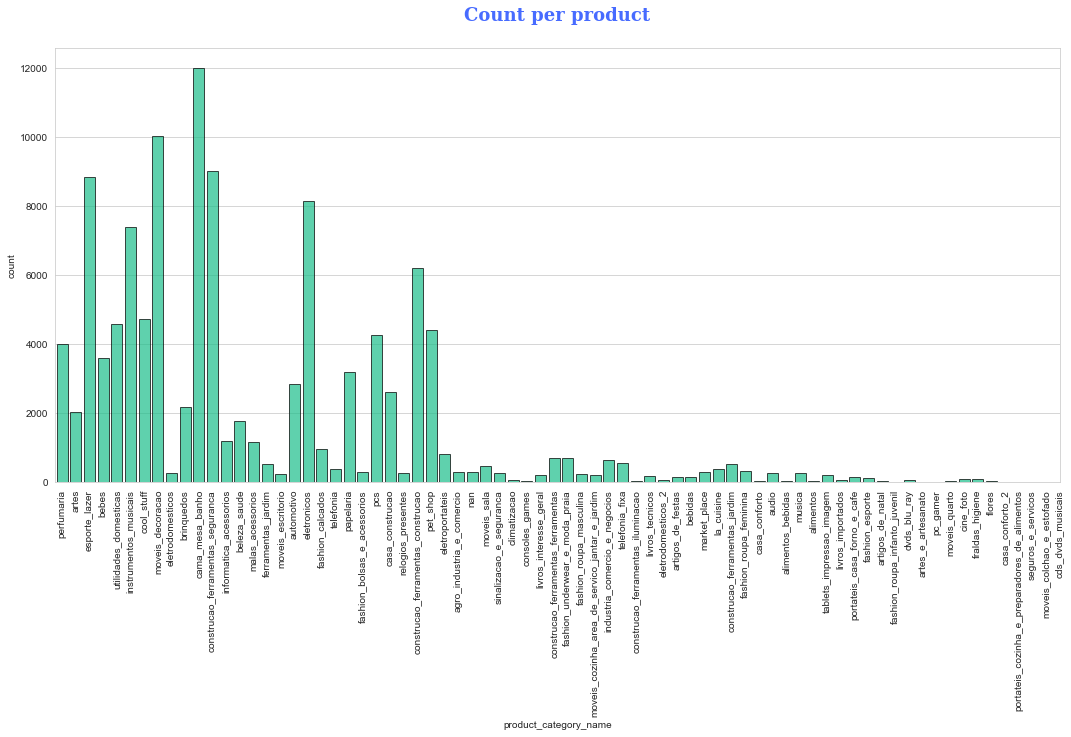

In [33]:
# Plot categories count in dataset
sns.set_style("whitegrid")
font_title = {"family": "serif",
              "color":  "#476bff",
              "weight": "bold",
              "size": 18}

fig = plt.figure(figsize=(18, 8))
sns.countplot(data=FinalMerge, x="product_category_name",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.xticks(range(0, products["product_category_name"].nunique()+1),
           products["product_category_name"].unique(),
           rotation=90)
plt.title(f"Count per product\n",
          fontdict=font_title)
plt.show()

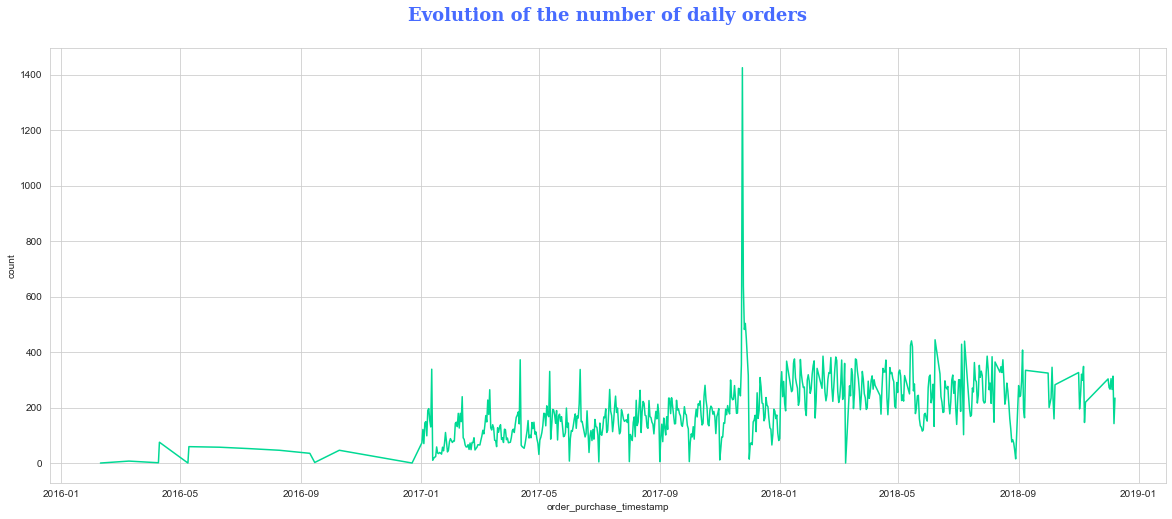

In [34]:
#Checking Order Evolution
orders_per_days = FinalMerge.groupby(FinalMerge["order_purchase_timestamp"]\
                                      .astype('datetime64[ns]').dt.date)\
                                    .count()["order_id"]
fig = plt.figure(figsize=(20, 8))
ax = orders_per_days.plot(color="#00d994")
ax.set_ylabel("count")
plt.title(f"Evolution of the number of daily orders\n",
          fontdict=font_title)
plt.show()

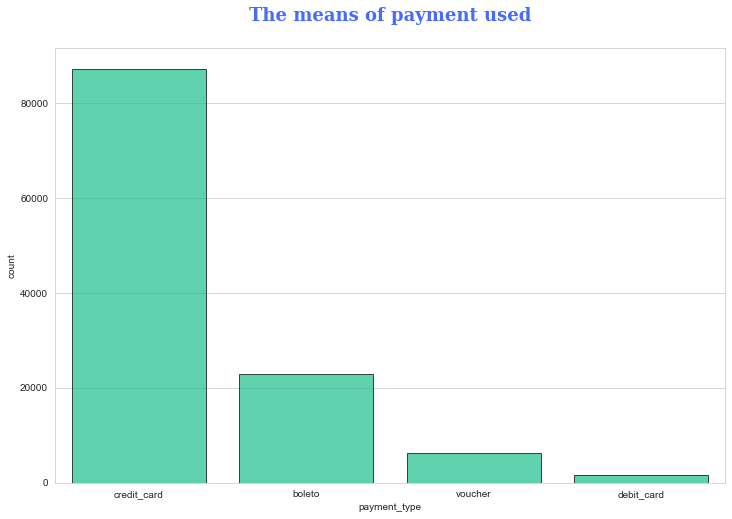

In [35]:
#Checking prefer mode of payments
fig = plt.figure(figsize=(12, 8))
sns.countplot(data=FinalMerge, x="payment_type",
              edgecolor="black",
              color="#00d994", alpha=0.7)
plt.title(f"The means of payment used\n",
          fontdict=font_title)
plt.show()

We note that about 80% of payments are made by credit card. We will therefore not take this variable into account in our explorations.

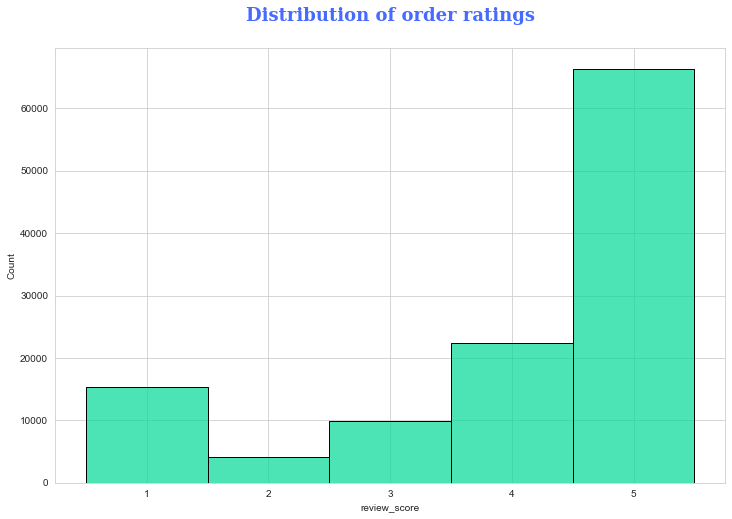

In [36]:
#checking the distribution of orders
fig = plt.figure(figsize=(12, 8))
sns.histplot(data=FinalMerge, x="review_score", 
             discrete=True,
             edgecolor="black",
             color="#00d994", alpha=0.7)
plt.title(f"Distribution of order ratings\n",
          fontdict=font_title)
plt.show()

In [38]:
# which all cities are there in the datasets?
FinalMerge['customer_city'].value_counts().sort_values(ascending=False)

sao paulo               18728
rio de janeiro           8261
belo horizonte           3274
brasilia                 2484
curitiba                 1816
                        ...  
dom joaquim                 1
cambiasca                   1
boa vista do burica         1
alvorada do gurgueia        1
bemposta                    1
Name: customer_city, Length: 4110, dtype: int64

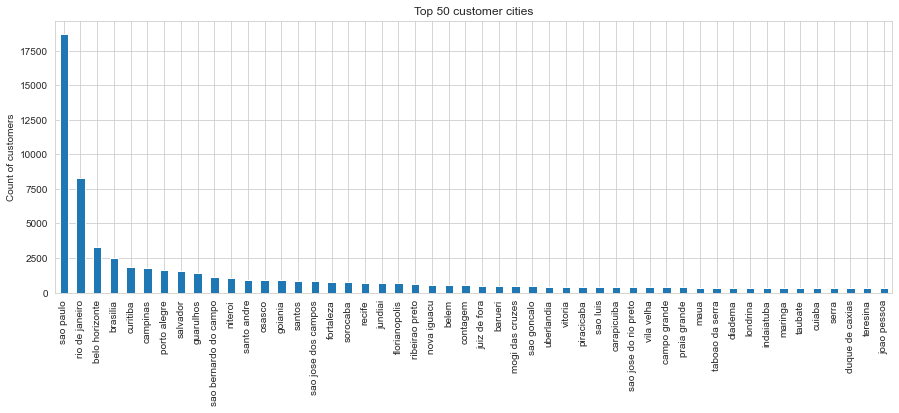

In [39]:
#Displaying Top 50 cities
(
    FinalMerge['customer_city']
    .value_counts()
    .sort_values(ascending=False)
    .head(50)
    .plot(kind='bar', figsize=(15, 5))
)

plt.title('Top 50 customer cities')
plt.ylabel('Count of customers');

The customers come from 4119 different cities, with Sao Paulo as the city where most of the customers live.

In [40]:
# How many states are the customers from?
FinalMerge['customer_state'].nunique()

27

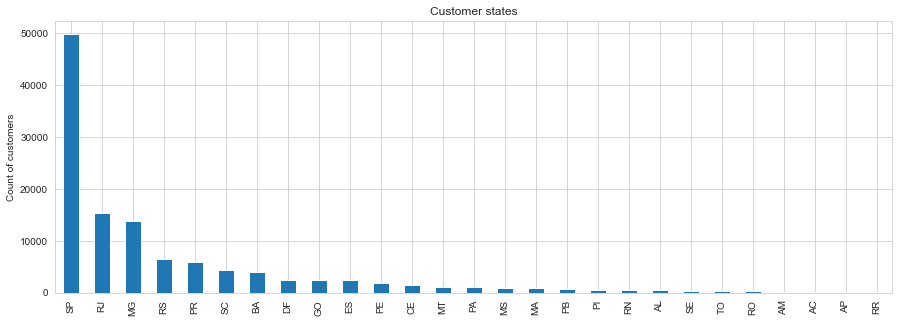

In [41]:
# States distribution
(
    FinalMerge['customer_state']
    .value_counts()
    .sort_values(ascending=False)
    .plot(kind='bar', figsize=(15, 5))
)

plt.title('Customer states')
plt.ylabel('Count of customers');

The customers come from 27 different states whith Sao Paulo as the state where most of the customers live.

In [42]:
# How many zip codes?
FinalMerge['customer_zip_code_prefix'].nunique()

14976

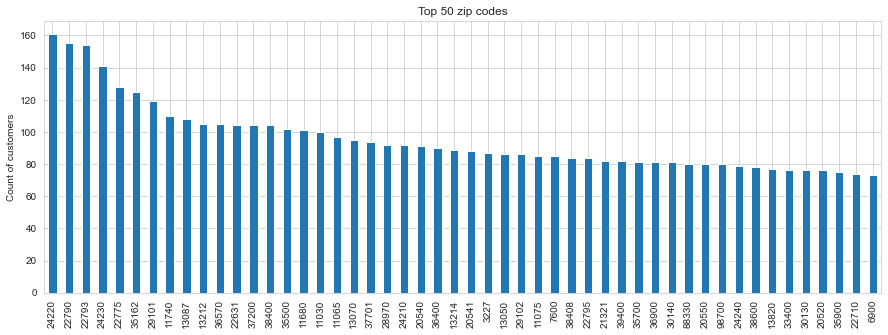

In [43]:
# Top 50 zip codes
(
    FinalMerge['customer_zip_code_prefix']
    .value_counts()
    .sort_values(ascending=False)
    .head(50)
    .plot(kind='bar', figsize=(15, 5))
    )

plt.title('Top 50 zip codes')
plt.ylabel('Count of customers');

In [44]:
FinalMerge.shape

(118318, 41)

We will drop the features with maximum missing values along with unique id's & the zip codes as we have same information from the state columns

In [45]:
del_features_list = ["review_comment_title","review_comment_message","order_id",
                     "product_id","product_category_name","product_category_name_english","seller_id","review_id",
                     "customer_id","customer_unique_id","customer_zip_code_prefix","seller_zip_code_prefix"]
FinalMerge.drop(del_features_list,
                 axis=1,
                 inplace=True)

In [46]:
FinalMerge.head(3)

,Unnamed: 0,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_city,customer_state
0,0,1,19-09-2017 09:45,58.9,13.29,1.0,credit_card,2.0,72.19,5,...,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,campos dos goytacazes,RJ
1,1,1,03-05-2017 11:05,239.9,19.93,1.0,credit_card,3.0,259.83,4,...,239.0,2.0,30000.0,50.0,30.0,40.0,sao paulo,SP,santa fe do sul,SP
2,2,1,18-01-2018 14:48,199.0,17.87,1.0,credit_card,5.0,216.87,5,...,695.0,2.0,3050.0,33.0,13.0,33.0,borda da mata,MG,para de minas,MG


In [47]:
#Checking For Missing Values
FinalMerge.isnull().sum()

Unnamed: 0                          0
order_item_id                       0
shipping_limit_date                 0
price                               0
freight_value                       0
payment_sequential                  3
payment_type                        3
payment_installments                3
payment_value                       3
review_score                        0
review_creation_date                0
review_answer_timestamp             0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1254
order_delivered_customer_date    2588
order_estimated_delivery_date       0
product_name_lenght              1709
product_description_lenght       1709
product_photos_qty               1709
product_weight_g                   20
product_length_cm                  20
product_height_cm                  20
product_width_cm                   20
seller_city                         0
seller_state

In [48]:
del_features_list=["order_delivered_carrier_date","order_delivered_customer_date"]
FinalMerge.drop(del_features_list,
                 axis=1,
                 inplace=True)

## Handling Missing Values

<AxesSubplot:>

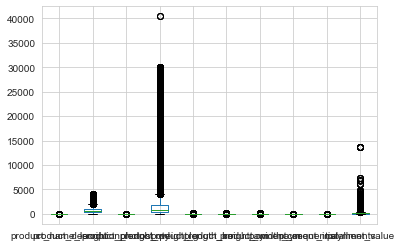

In [49]:
#BoxPlots
FinalMerge[['product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm','payment_sequential','payment_installments','payment_value']].plot.box()

<AxesSubplot:>

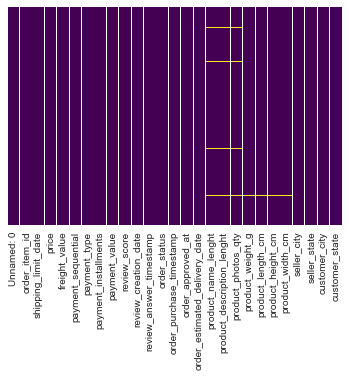

In [50]:
sns.heatmap(FinalMerge.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [51]:
#features to handle:- product_name_lenght,product_description_lenght,product_photos_qty, product_weight_g 
# product_length_cm ,product_height_cm ,product_width_cm ,payment_sequential, payment_type
#payment_installments,payment_value 
#FinalMerge['product_name_lenght']=FinalMerge['product_name_lenght'].fillna(FinalMerge['product_name_lenght'].mean())

#FinalMerge['product_description_lenght']=FinalMerge['product_description_lenght'].fillna(FinalMerge['product_name_lenght'].mean())

#FinalMerge['product_photos_qty']=FinalMerge['product_photos_qty'].fillna(FinalMerge['product_name_lenght'].mean())

#FinalMerge['product_weight_g']=FinalMerge['product_weight_g'].fillna(FinalMerge['product_weight_g'].mean())

#FinalMerge['product_length_cm']=FinalMerge['product_length_cm'].fillna(FinalMerge['product_length_cm'].mean())

#FinalMerge['product_height_cm']=FinalMerge['product_height_cm'].fillna(FinalMerge['product_height_cm'].mean())

#FinalMerge['product_width_cm']=FinalMerge['product_width_cm'].fillna(FinalMerge['product_width_cm'].mean())

#FinalMerge['payment_sequential']=FinalMerge['payment_sequential'].fillna(FinalMerge['payment_sequential'].mean())

#FinalMerge['payment_installments']=FinalMerge['payment_installments'].fillna(FinalMerge['payment_installments'].mean())

#FinalMerge['payment_value']=FinalMerge['payment_value'].fillna(FinalMerge['payment_value'].mean())

In [52]:
#features to handle:- product_name_lenght,product_description_lenght,product_photos_qty, product_weight_g 
# product_length_cm ,product_height_cm ,product_width_cm ,payment_sequential, payment_type
#payment_installments,payment_value         

FinalMerge['product_name_lenght']=FinalMerge['product_name_lenght'].fillna(FinalMerge['product_name_lenght'].median())

FinalMerge['product_description_lenght']=FinalMerge['product_description_lenght'].fillna(FinalMerge['product_name_lenght'].median())

FinalMerge['product_photos_qty']=FinalMerge['product_photos_qty'].fillna(FinalMerge['product_name_lenght'].median())

FinalMerge['product_weight_g']=FinalMerge['product_weight_g'].fillna(FinalMerge['product_weight_g'].median())

FinalMerge['product_length_cm']=FinalMerge['product_length_cm'].fillna(FinalMerge['product_length_cm'].median())

FinalMerge['product_height_cm']=FinalMerge['product_height_cm'].fillna(FinalMerge['product_height_cm'].median())

FinalMerge['product_width_cm']=FinalMerge['product_width_cm'].fillna(FinalMerge['product_width_cm'].median())

FinalMerge['payment_sequential']=FinalMerge['payment_sequential'].fillna(FinalMerge['payment_sequential'].median())

FinalMerge['payment_installments']=FinalMerge['payment_installments'].fillna(FinalMerge['payment_installments'].median())

FinalMerge['payment_value']=FinalMerge['payment_value'].fillna(FinalMerge['payment_value'].median())


In [53]:
#Checking For Missing Values
FinalMerge.isnull().sum()

Unnamed: 0                        0
order_item_id                     0
shipping_limit_date               0
price                             0
freight_value                     0
payment_sequential                0
payment_type                      3
payment_installments              0
payment_value                     0
review_score                      0
review_creation_date              0
review_answer_timestamp           0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_estimated_delivery_date     0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
seller_city                       0
seller_state                      0
customer_city                     0
customer_state                    0
dtype: int64

In [54]:
FinalMerge['payment_type']=FinalMerge['payment_type'].fillna(FinalMerge['payment_type'].mode()[0])

In [55]:
FinalMerge.isnull().sum()

Unnamed: 0                        0
order_item_id                     0
shipping_limit_date               0
price                             0
freight_value                     0
payment_sequential                0
payment_type                      0
payment_installments              0
payment_value                     0
review_score                      0
review_creation_date              0
review_answer_timestamp           0
order_status                      0
order_purchase_timestamp          0
order_approved_at                15
order_estimated_delivery_date     0
product_name_lenght               0
product_description_lenght        0
product_photos_qty                0
product_weight_g                  0
product_length_cm                 0
product_height_cm                 0
product_width_cm                  0
seller_city                       0
seller_state                      0
customer_city                     0
customer_state                    0
dtype: int64

In [56]:
FinalMerge.head(3)

,Unnamed: 0,order_item_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_city,customer_state
0,0,1,19-09-2017 09:45,58.9,13.29,1.0,credit_card,2.0,72.19,5,...,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,campos dos goytacazes,RJ
1,1,1,03-05-2017 11:05,239.9,19.93,1.0,credit_card,3.0,259.83,4,...,239.0,2.0,30000.0,50.0,30.0,40.0,sao paulo,SP,santa fe do sul,SP
2,2,1,18-01-2018 14:48,199.0,17.87,1.0,credit_card,5.0,216.87,5,...,695.0,2.0,3050.0,33.0,13.0,33.0,borda da mata,MG,para de minas,MG


In [57]:
mergecopy=pd.read_csv("C:/Users/lenovo/Desktop/Ecommerce BI/FinalMerge.csv")

In [58]:
mergecopy.drop(['order_purchase_timestamp','order_approved_at','review_answer_timestamp','review_creation_date','shipping_limit_date','order_estimated_delivery_date'],axis=1,inplace=True)

In [59]:
mergecopy.head(3)

,Unnamed: 0,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_status,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_city,customer_state
0,0,1,58.9,13.29,1.0,credit_card,2.0,72.19,5,delivered,...,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SP,campos dos goytacazes,RJ
1,1,1,239.9,19.93,1.0,credit_card,3.0,259.83,4,delivered,...,239.0,2.0,30000.0,50.0,30.0,40.0,sao paulo,SP,santa fe do sul,SP
2,2,1,199.0,17.87,1.0,credit_card,5.0,216.87,5,delivered,...,695.0,2.0,3050.0,33.0,13.0,33.0,borda da mata,MG,para de minas,MG


In [60]:
mergecopy.shape

(118318, 21)

## Checking For Unique Values

In [61]:
mergecopy.order_status.unique()

array(['delivered', 'shipped', 'canceled', 'invoiced', 'processing',
       'approved', 'unavailable'], dtype=object)

In [62]:
mergecopy.payment_type.unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card'], dtype=object)

In [63]:
mergecopy.seller_state.unique()

array(['SP', 'MG', 'PR', 'SC', 'DF', 'RS', 'RJ', 'GO', 'MA', 'ES', 'BA',
       'PI', 'RO', 'MT', 'CE', 'RN', 'PE', 'SE', 'MS', 'PB', 'PA', 'AM',
       'AC'], dtype=object)

In [64]:
mergecopy.customer_state.unique()

array(['RJ', 'SP', 'MG', 'PR', 'GO', 'BA', 'AL', 'MS', 'CE', 'DF', 'RS',
       'PE', 'SC', 'ES', 'MA', 'PA', 'MT', 'PB', 'AM', 'AP', 'PI', 'TO',
       'RO', 'RN', 'SE', 'AC', 'RR'], dtype=object)

We will merge the states into region.

In [65]:
mergecopy.seller_state.value_counts()

SP    84384
MG     9314
PR     9097
RJ     5036
SC     4271
RS     2294
DF      949
BA      700
GO      550
PE      465
MA      410
ES      390
MT      147
CE      103
MS       60
RN       56
PB       44
RO       14
PI       12
SE       10
PA        8
AM        3
AC        1
Name: seller_state, dtype: int64

In [66]:
mergecopy.customer_state.unique()

array(['RJ', 'SP', 'MG', 'PR', 'GO', 'BA', 'AL', 'MS', 'CE', 'DF', 'RS',
       'PE', 'SC', 'ES', 'MA', 'PA', 'MT', 'PB', 'AM', 'AP', 'PI', 'TO',
       'RO', 'RN', 'SE', 'AC', 'RR'], dtype=object)

In [67]:
mergecopy.customer_state.value_counts()

SP    49868
RJ    15425
MG    13718
RS     6539
PR     5988
SC     4319
BA     4069
DF     2500
GO     2453
ES     2351
PE     1903
CE     1556
MT     1128
PA     1124
MS      856
MA      849
PB      640
PI      574
RN      571
AL      462
SE      397
TO      339
RO      286
AM      172
AC       95
AP       84
RR       52
Name: customer_state, dtype: int64

In [68]:
mergecopy['seller_state'] = mergecopy['seller_state'].replace({'DF':'CENTRAL-WEST','BA':'EAST','GO':'CENTRAL-WEST',
                                                               'PE':'EAST','ES':'SOUTH-EAST','MT':'CENTRAL-WEST',
                                                               'CE':'EAST','MS':'CENTRAL-WEST','RN':'EAST',
                                                               'PB':'EAST','RO':'NORTH','PI':'EAST',
                                                               'SE':'EAST','PA':'NORTH','AM':'NORTH','AC':'NORTH',
                                                                'SP':'SOUTH-EAST','RJ':'SOUTH-EAST','MG':'SOUTH-EAST',
                                                                'RS':'SOUTH','PR':'SOUTH','SC':'SOUTH','MI':'EAST'})

In [69]:
mergecopy.seller_state.value_counts()

SOUTH-EAST      99124
SOUTH           15662
CENTRAL-WEST     1706
EAST             1390
MA                410
NORTH              26
Name: seller_state, dtype: int64

In [70]:
mergecopy['seller_state'] = mergecopy['seller_state'].replace({'MA':'EAST'})

In [71]:
mergecopy['customer_state'] = mergecopy['customer_state'].replace({'DF':'CENTRAL-WEST','BA':'EAST','GO':'CENTRAL-WEST',
                                                               'PE':'EAST','ES':'SOUTH-EAST','MT':'CENTRAL-WEST',
                                                               'CE':'EAST','MS':'CENTRAL-WEST','RN':'EAST',
                                                               'PB':'EAST','RO':'NORTH','PI':'EAST',
                                                               'SE':'EAST','PA':'NORTH','AM':'NORTH','AC':'NORTH',
                                                                'SP':'SOUTH-EAST','RJ':'SOUTH-EAST','MG':'SOUTH-EAST',
                                                                'RS':'SOUTH','PR':'SOUTH','SC':'SOUTH','MI':'EAST',
                                                                'AL':'EAST','TO':'NORTH','AP':'NORTH','RR':'NORTH'})

In [72]:
mergecopy['customer_state'] = mergecopy['customer_state'].replace({'MA':'EAST'})

In [73]:
mergecopy.customer_state.value_counts()

SOUTH-EAST      81362
SOUTH           16846
EAST            11021
CENTRAL-WEST     6937
NORTH            2152
Name: customer_state, dtype: int64

In [74]:
mergecopy.head(3)

,Unnamed: 0,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_status,...,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_city,seller_state,customer_city,customer_state
0,0,1,58.9,13.29,1.0,credit_card,2.0,72.19,5,delivered,...,598.0,4.0,650.0,28.0,9.0,14.0,volta redonda,SOUTH-EAST,campos dos goytacazes,SOUTH-EAST
1,1,1,239.9,19.93,1.0,credit_card,3.0,259.83,4,delivered,...,239.0,2.0,30000.0,50.0,30.0,40.0,sao paulo,SOUTH-EAST,santa fe do sul,SOUTH-EAST
2,2,1,199.0,17.87,1.0,credit_card,5.0,216.87,5,delivered,...,695.0,2.0,3050.0,33.0,13.0,33.0,borda da mata,SOUTH-EAST,para de minas,SOUTH-EAST


In [75]:
mergecopy.customer_city.value_counts()

sao paulo                   18728
rio de janeiro               8261
belo horizonte               3274
brasilia                     2484
curitiba                     1816
                            ...  
apore                           1
neopolis                        1
santo antonio dos campos        1
ponto belo                      1
bemposta                        1
Name: customer_city, Length: 4110, dtype: int64

In [76]:
mergecopy.seller_city.value_counts()

sao paulo                29294
ibitinga                  8375
curitiba                  3161
santo andre               3149
sao jose do rio preto     2693
                         ...  
pirassununga                 1
angra dos reis rj            1
uniao da vitoria             1
bage                         1
presidente getulio           1
Name: seller_city, Length: 611, dtype: int64

Since cities are the part of states we'll focus on states and drop cities

In [77]:
mergecopy.drop(["customer_city","seller_city"],axis=1,inplace=True)

In [78]:
mergecopy.head(3)

,Unnamed: 0,order_item_id,price,freight_value,payment_sequential,payment_type,payment_installments,payment_value,review_score,order_status,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_state,customer_state
0,0,1,58.9,13.29,1.0,credit_card,2.0,72.19,5,delivered,58.0,598.0,4.0,650.0,28.0,9.0,14.0,SOUTH-EAST,SOUTH-EAST
1,1,1,239.9,19.93,1.0,credit_card,3.0,259.83,4,delivered,56.0,239.0,2.0,30000.0,50.0,30.0,40.0,SOUTH-EAST,SOUTH-EAST
2,2,1,199.0,17.87,1.0,credit_card,5.0,216.87,5,delivered,59.0,695.0,2.0,3050.0,33.0,13.0,33.0,SOUTH-EAST,SOUTH-EAST


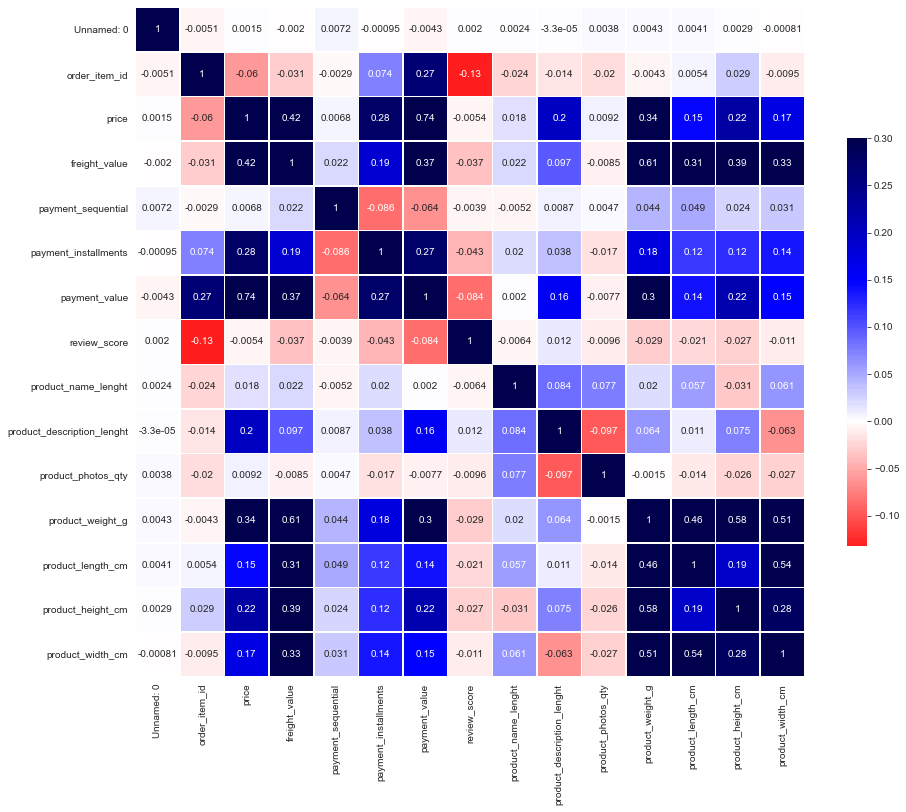

In [79]:
plt.figure(figsize = (15, 15))
sns.heatmap(mergecopy.corr(),
            cmap = 'seismic_r',
            vmax = 0.3, center=0,
            square = True,
            linewidths = 0.5,
            cbar_kws = {"shrink": 0.5},
            annot = True);

In [80]:
mergecopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118318 entries, 0 to 118317
Data columns (total 19 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  118318 non-null  int64  
 1   order_item_id               118318 non-null  int64  
 2   price                       118318 non-null  float64
 3   freight_value               118318 non-null  float64
 4   payment_sequential          118318 non-null  float64
 5   payment_type                118318 non-null  object 
 6   payment_installments        118318 non-null  float64
 7   payment_value               118318 non-null  float64
 8   review_score                118318 non-null  int64  
 9   order_status                118318 non-null  object 
 10  product_name_lenght         118318 non-null  float64
 11  product_description_lenght  118318 non-null  float64
 12  product_photos_qty          118318 non-null  float64
 13  product_weight

### Creating Categorical data into Numerical Type

In [81]:
dummy1 =  pd.get_dummies(mergecopy['payment_type'],prefix ='payment_type',drop_first=True)
mergecopy= pd.concat([mergecopy,dummy1],axis=1)
mergecopy.drop('payment_type',axis=1,inplace=True)

In [82]:
dummy2 =  pd.get_dummies(mergecopy['order_status'],prefix ='order_status',drop_first=True)
mergecopy= pd.concat([mergecopy,dummy2],axis=1)
mergecopy.drop('order_status',axis=1,inplace=True)

In [83]:
dummy3 =  pd.get_dummies(mergecopy['seller_state'],prefix ='seller_state',drop_first=True)
mergecopy= pd.concat([mergecopy,dummy3],axis=1)
mergecopy.drop('seller_state',axis=1,inplace=True)

In [84]:
dummy4 =  pd.get_dummies(mergecopy['customer_state'],prefix ='customer_state',drop_first=True)
mergecopy= pd.concat([mergecopy,dummy4],axis=1)
mergecopy.drop('customer_state',axis=1,inplace=True)

In [85]:
mergecopy.head(3)

,Unnamed: 0,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,...,order_status_shipped,order_status_unavailable,seller_state_EAST,seller_state_NORTH,seller_state_SOUTH,seller_state_SOUTH-EAST,customer_state_EAST,customer_state_NORTH,customer_state_SOUTH,customer_state_SOUTH-EAST
0,0,1,58.9,13.29,1.0,2.0,72.19,5,58.0,598.0,...,0,0,0,0,0,1,0,0,0,1
1,1,1,239.9,19.93,1.0,3.0,259.83,4,56.0,239.0,...,0,0,0,0,0,1,0,0,0,1
2,2,1,199.0,17.87,1.0,5.0,216.87,5,59.0,695.0,...,0,0,0,0,0,1,0,0,0,1


In [86]:
mergecopy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118318 entries, 0 to 118317
Data columns (total 32 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Unnamed: 0                  118318 non-null  int64  
 1   order_item_id               118318 non-null  int64  
 2   price                       118318 non-null  float64
 3   freight_value               118318 non-null  float64
 4   payment_sequential          118318 non-null  float64
 5   payment_installments        118318 non-null  float64
 6   payment_value               118318 non-null  float64
 7   review_score                118318 non-null  int64  
 8   product_name_lenght         118318 non-null  float64
 9   product_description_lenght  118318 non-null  float64
 10  product_photos_qty          118318 non-null  float64
 11  product_weight_g            118318 non-null  float64
 12  product_length_cm           118318 non-null  float64
 13  product_height

In [87]:
mergecopy.corr()

,Unnamed: 0,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,...,order_status_shipped,order_status_unavailable,seller_state_EAST,seller_state_NORTH,seller_state_SOUTH,seller_state_SOUTH-EAST,customer_state_EAST,customer_state_NORTH,customer_state_SOUTH,customer_state_SOUTH-EAST
Unnamed: 0,1.000000,-0.005054,0.001484,-0.001978,0.007235,-0.000950,-0.004301,0.001976,0.002422,-0.000033,...,0.005888,-0.004911,-0.007197,-0.000100,0.001871,-0.000005,-0.010056,-0.005470,0.000287,0.006854
order_item_id,-0.005054,1.000000,-0.060461,-0.030697,-0.002872,0.073798,0.265197,-0.131932,-0.024217,-0.014170,...,-0.016235,-0.000590,-0.011921,-0.003350,-0.007418,0.013969,-0.020785,-0.007499,0.008792,0.000129
price,0.001484,-0.060461,1.000000,0.415944,0.006838,0.277674,0.739243,-0.005440,0.017662,0.199004,...,0.006667,0.006942,0.110112,0.013341,0.067969,-0.099413,0.048097,0.030886,0.001056,-0.048170
freight_value,-0.001978,-0.030697,0.415944,1.000000,0.022346,0.185718,0.373768,-0.037284,0.021883,0.097032,...,0.020108,-0.000515,0.083717,0.016623,0.103240,-0.131977,0.243764,0.146552,0.032072,-0.244768
payment_sequential,0.007235,-0.002872,0.006838,0.022346,1.000000,-0.086122,-0.064199,-0.003854,-0.005210,0.008688,...,0.036912,-0.000993,0.000729,-0.001914,0.007868,-0.009963,-0.006172,-0.002467,-0.017215,0.014796
payment_installments,-0.000950,0.073798,0.277674,0.185718,-0.086122,1.000000,0.273691,-0.042998,0.020074,0.037846,...,0.005017,0.005694,0.023781,0.011386,0.023443,-0.030262,0.061144,0.016589,0.010276,-0.053739
payment_value,-0.004301,0.265197,0.739243,0.373768,-0.064199,0.273691,1.000000,-0.084410,0.001955,0.155360,...,-0.005663,0.004627,0.077625,0.008578,0.057012,-0.077690,0.049584,0.029204,0.009655,-0.059123
review_score,0.001976,-0.131932,-0.005440,-0.037284,-0.003854,-0.042998,-0.084410,1.000000,-0.006357,0.011802,...,-0.151730,-0.013420,0.004090,-0.002597,0.019097,-0.022285,-0.041838,-0.010170,0.008448,0.027116
product_name_lenght,0.002422,-0.024217,0.017662,0.021883,-0.005210,0.020074,0.001955,-0.006357,1.000000,0.084176,...,0.003694,-0.008014,0.007222,-0.004815,-0.031442,0.028810,0.012637,0.007088,0.006216,-0.016113
product_description_lenght,-0.000033,-0.014170,0.199004,0.097032,0.008688,0.037846,0.155360,0.011802,0.084176,1.000000,...,0.012015,-0.000423,0.104618,0.003500,0.045719,-0.078499,0.028617,0.014232,0.003816,-0.032961


C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Price / Frieght-val')

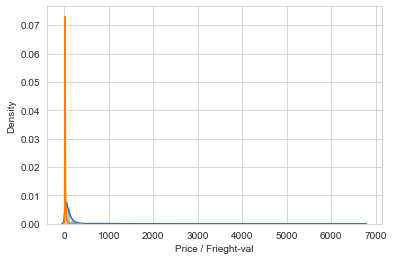

In [88]:
#Visualising the data
plot_price = sns.distplot(mergecopy["price"])
plot_frieght = sns.distplot(mergecopy["freight_value"])
plt.xlabel('Price / Frieght-val')

[(0.0, 1000.0)]

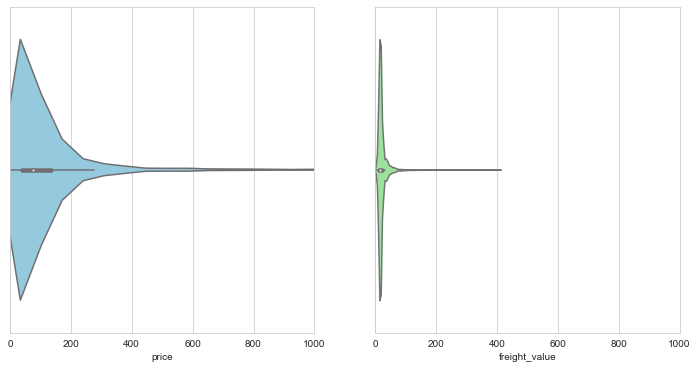

In [89]:
f, axes = plt.subplots(1,2, figsize=(12,6), sharex=True, sharey=True)
v1 = sns.violinplot(data=mergecopy, x='price', color="skyblue",ax=axes[0])
v2 = sns.violinplot(data=mergecopy, x='freight_value',color="lightgreen", ax=axes[1])
v1.set(xlim=(0,1000))

In [90]:
def draw_scatterplot(x_data, x_label, y_data, y_label):
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)

    plt.xlim(0, 500)
    plt.ylim(0, 500)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.scatter(x_data, y_data, s=30)


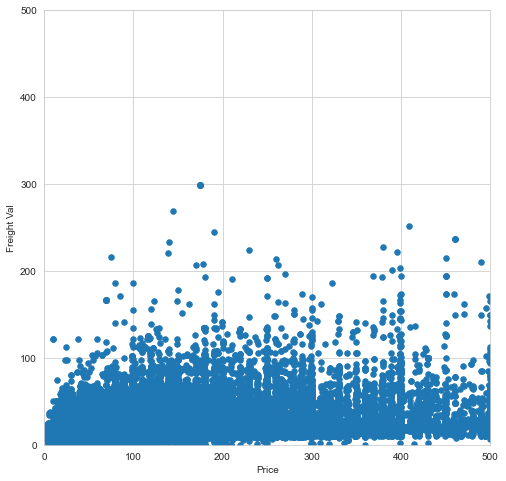

In [91]:
draw_scatterplot(mergecopy['price'],'Price', mergecopy['freight_value'], 'Freight Val')

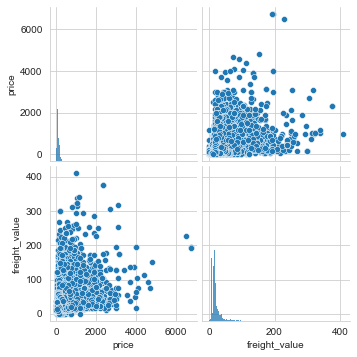

In [92]:
sns.pairplot(mergecopy[['price','freight_value']])

In [93]:
import sklearn.cluster as cluster

We'll run the cluster analysis 13 times using clusters 1 till 13. we'll store the wss scores which will be used for elbow plot.

In [94]:
## We'll run clusters 13 times

K=range(1,13)
wss=[]
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(mergecopy)
    wss.append(kmeans.inertia_)

In [95]:
kmeans.labels_

array([1, 1, 1, ..., 3, 3, 3])

In [96]:
wss

[139788698287262.05,
 36266837757451.08,
 17096227770041.69,
 10386618865756.549,
 7280787218877.595,
 5594471598207.286,
 4576336702068.934,
 3916838396839.781,
 3464762513657.1553,
 3140626714045.8633,
 2901663799674.1963,
 2666133351649.3203]

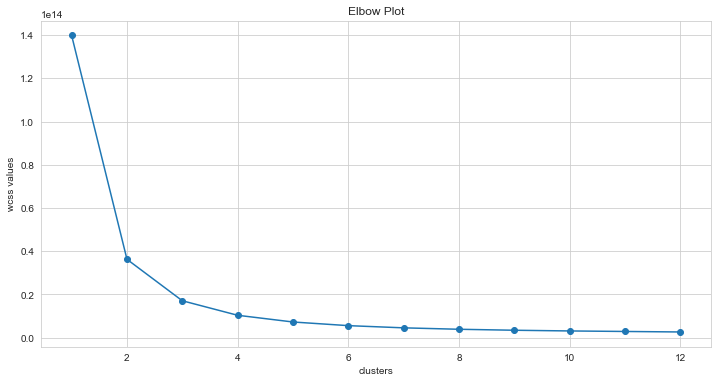

In [97]:
#plotting elbow plot
plt.figure(figsize=(12,6))
plt.plot( K, wss, marker = "o" )  #elbow graph
plt.title('Elbow Plot')
plt.xlabel('clusters')
plt.ylabel('wcss values')
plt.show()


Since there is no pattern after 4 we'll take cluster=4

In [98]:
# Taking clusters=4,we'll create a new kmeans model and train the clusters:
kmeans2 = cluster.KMeans(n_clusters=4, n_init=13 ,random_state=100)

clusters = kmeans2.fit_predict(mergecopy)

# Adding a label feature with the predicted class values:
algocopy = mergecopy.copy(deep=True)   # copy for not disturbing the dataframe
algocopy['label'] = clusters

In [99]:
algocopy['label'].unique()

array([0, 3, 1, 2])

In [100]:
algocopy.head(3)

,Unnamed: 0,order_item_id,price,freight_value,payment_sequential,payment_installments,payment_value,review_score,product_name_lenght,product_description_lenght,...,order_status_unavailable,seller_state_EAST,seller_state_NORTH,seller_state_SOUTH,seller_state_SOUTH-EAST,customer_state_EAST,customer_state_NORTH,customer_state_SOUTH,customer_state_SOUTH-EAST,label
0,0,1,58.9,13.29,1.0,2.0,72.19,5,58.0,598.0,...,0,0,0,0,1,0,0,0,1,0
1,1,1,239.9,19.93,1.0,3.0,259.83,4,56.0,239.0,...,0,0,0,0,1,0,0,0,1,0
2,2,1,199.0,17.87,1.0,5.0,216.87,5,59.0,695.0,...,0,0,0,0,1,0,0,0,1,0


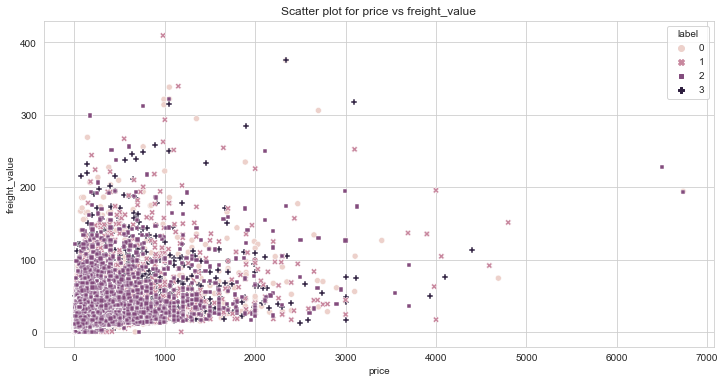

In [101]:
# ploting the figure of cluster for any two features

plt.figure(figsize=(12,6))
plt.title('Scatter plot for price vs freight_value')
sns.scatterplot(x='price', y='freight_value', hue='label', style='label', data=algocopy)
plt.show()

In [102]:
import math
import matplotlib as m

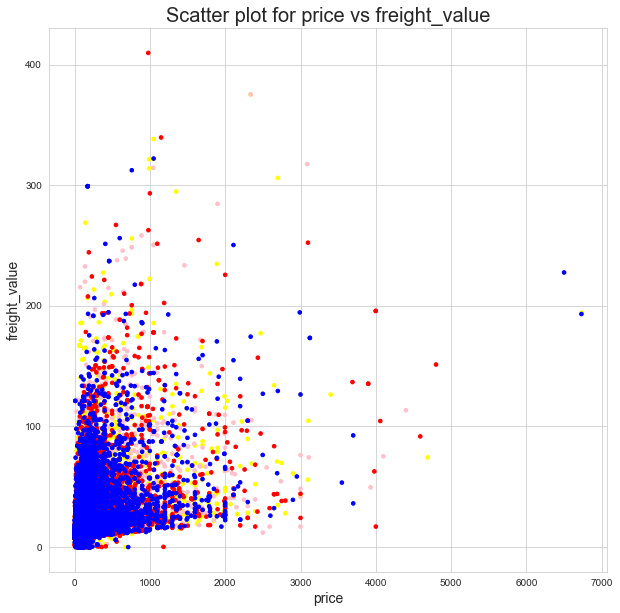

In [103]:
# Plotting resulting clusters
colors=['yellow','red','blue','pink']
plt.figure(figsize=(10,10))
plt.scatter(algocopy['price'],algocopy['freight_value'],c=algocopy['label'],s=13,cmap=m.colors.ListedColormap(colors))
plt.title('Scatter plot for price vs freight_value',fontsize=20)
plt.xlabel('price',fontsize=14)
plt.ylabel('freight_value',fontsize=14)
plt.show()

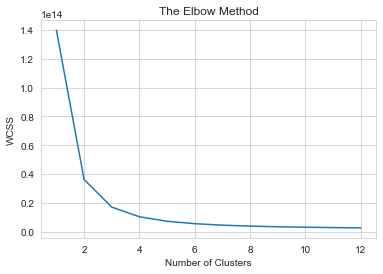

In [104]:
plt.plot(range(1,13),wss)
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


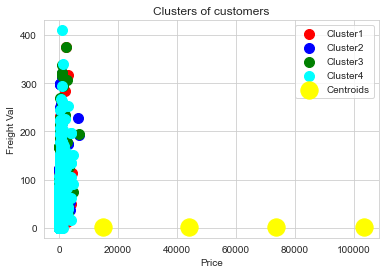

In [105]:
from sklearn.cluster import KMeans
#Fitting K-MEans to the dataset
kmeans=KMeans(n_clusters=4,init='k-means++',random_state=0)
y_kmeans=kmeans.fit_predict(mergecopy)

#Visualize the clusters
X=mergecopy.iloc[:,[2,3]].values
plt.scatter(X[y_kmeans==0,0],X[y_kmeans==0,1],s=100,c='red',label='Cluster1')
plt.scatter(X[y_kmeans==1,0],X[y_kmeans==1,1],s=100,c='blue',label='Cluster2')
plt.scatter(X[y_kmeans==2,0],X[y_kmeans==2,1],s=100,c='green',label='Cluster3')
plt.scatter(X[y_kmeans==3,0],X[y_kmeans==3,1],s=100,c='cyan',label='Cluster4')

plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')

plt.title('Clusters of customers')
plt.xlabel('Price')
plt.ylabel('Freight Val')
plt.legend()
plt.show()

## RFM
RFM is a method used for analyzing customer value. It is commonly used in database marketing and direct marketing and has received particular attention in retail and professional services industries.

### The classification is based on a few input parameters for each customer (i):
Recency(i) =Reference date (last day in dataset) — Date of last order(i) ) 1.e Recency is Days since last order

Frequency(i) = Count(orders)(i) i.e Number of total order

Monetary(i): Sum(purchase order values)(i) i.e Monetary is Amount of total purchase value

We will create a work copy:

In [106]:
newfile=pd.read_csv('C:/Users/lenovo/Desktop/Ecommerce BI/Merge7.csv')

In [107]:
newfile.head(3)

,Unnamed: 0,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,...,product_height_cm,product_width_cm,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19-09-2017 09:45,58.9,13.29,1.0,credit_card,...,9.0,14.0,27277,volta redonda,SP,cool_stuff,871766c5855e863f6eccc05f988b23cb,28013,campos dos goytacazes,RJ
1,1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03-05-2017 11:05,239.9,19.93,1.0,credit_card,...,30.0,40.0,3471,sao paulo,SP,pet_shop,eb28e67c4c0b83846050ddfb8a35d051,15775,santa fe do sul,SP
2,2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18-01-2018 14:48,199.0,17.87,1.0,credit_card,...,13.0,33.0,37564,borda da mata,MG,furniture_decor,3818d81c6709e39d06b2738a8d3a2474,35661,para de minas,MG


In [108]:
# Create a work copy
df = newfile[[
    'customer_unique_id',
    'order_id',
    'order_status',
    'order_purchase_timestamp',
    'product_id',
    'price',
    'product_category_name'
    ]].copy()

In [109]:
df['order_status'].value_counts()

delivered      115731
shipped          1255
canceled          570
invoiced          376
processing        376
unavailable         7
approved            3
Name: order_status, dtype: int64

In [110]:
df = df[df['order_status']=='delivered']

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 115731 entries, 0 to 118317
Data columns (total 7 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   customer_unique_id        115731 non-null  object 
 1   order_id                  115731 non-null  object 
 2   order_status              115731 non-null  object 
 3   order_purchase_timestamp  115731 non-null  object 
 4   product_id                115731 non-null  object 
 5   price                     115731 non-null  float64
 6   product_category_name     114093 non-null  object 
dtypes: float64(1), object(6)
memory usage: 7.1+ MB


In [112]:
df.dtypes

customer_unique_id           object
order_id                     object
order_status                 object
order_purchase_timestamp     object
product_id                   object
price                       float64
product_category_name        object
dtype: object

In [113]:
# Modify object cols in timestamp format
datetime_cols = ["order_purchase_timestamp", "today"]
for col in datetime_cols:
    df[col] = df[col].astype('datetime64[ns]')
df.info()

KeyError: 'today'

In [114]:
# Setting reference day
df['today'] = df['order_purchase_timestamp'].max()
# Date deltas
df['recency'] = df['today'] - df['order_purchase_timestamp']

In [115]:
# Grouping by customer and order (same order_id = same day); This will be the data frame which contains all valid costomers and how they are segmented
customersegment = df.groupby([
    'customer_unique_id',
    'order_id'
    ], as_index=False).agg({
        'order_purchase_timestamp': 'first',
        'price': 'sum',
        'today': 'first',
        'recency': 'first'
        })

In [116]:
customersegment['recency'] = customersegment['recency'].astype(str)
customersegment['recency']= customersegment['recency'].str.replace(r'\s+days.*', '', regex=True)
customersegment['recency']= customersegment['recency'].astype(int)

In [117]:
customersegment = customersegment.groupby('customer_unique_id', as_index=False).agg({
        'recency': ['min', 'max', 'count'],
        'price': ['sum', 'mean']
        })

In [118]:
# Simplifying columns
customersegment.columns = [' '.join(col).strip() for col in customersegment.columns.values]

In [119]:
# Renaming columns
customersegment.rename(columns={
    'recency max': 'days_since_first_order',
    'recency min': 'recency',
    'recency count': 'frequency',
    'price sum': 'total_payment',
    'price mean': 'avg_payment'
    }, inplace=True)

In [120]:
# Defining time range conditions for classifying customers
total_time_range = str(df["order_purchase_timestamp"].max() - df["order_purchase_timestamp"].min())
total_time_range

'1003 days 14:14:00'

In [121]:
import re

In [122]:
# Splitting total time range in 4 time periods
period = int(re.sub(r'\s+days.*', '', total_time_range))/4

### Assigning activity clasifications

R(i): Quantile-based discretization for RFM classification:-
        
1: Recency(i) ≥ Third quartile (Q3) of total Time period
    
2: Recency(i) ≥ Second quartile (Q2) of total Time period < Third quartile (Q3) of total Time period
    
3: Recency(i) ≥ First quartile (Q1) of total Time period < Second quartile (Q2) of total Time period
    
4: Recency(i) < First quartile (Q1) of total Time period
    
    The timeline of the data will be split into four main segments. Each segment is 1/4 of the total time span of the data. We define the following Recency-segments:
Inactive,
Cold,
Hot,
Active.

In [123]:
segment_inactive = customersegment['recency'] > period * 3

segment_cold = (customersegment['recency'] > period * 2) & (customersegment['recency'] <= period * 3)

segment_hot = (customersegment['recency'] > period) & (customersegment['recency'] <= period * 2)

segment_active = customersegment['recency'] <= period

In [124]:
# Adding activities to dataframe
customersegment.loc[segment_inactive, "segment"] = "inactive"
customersegment.loc[segment_cold, "segment"] = "cold"
customersegment.loc[segment_hot, "segment"] = "hot"
customersegment.loc[segment_active, "segment"] = "active"

Total purchase value: The median is the threshold to divide the customers into: Low & High

In [125]:
# Defining payment range conditions for classifying customers
median_payment = customersegment['avg_payment'].median()

After allocating the customers to these clusters sub-segments are formed by combining the two main segments. The “Inactive” segment is not further divided into “Low” and “High”, so that we get 7 sub-segments:

Inactive

Cold-Low

Cold-High

Hot-Low

Hot-High

Active-Low

Active-High

In [126]:
# Sub segments

segment_inactive_low = customersegment['segment'] == 'inactive'

segment_cold_low = (customersegment['segment'] == 'cold') & (customersegment['avg_payment'] < median_payment)

segment_cold_high = (customersegment['segment'] == 'cold') & (customersegment['avg_payment'] >= median_payment)

segment_hot_low = (customersegment['segment'] == 'hot') & (customersegment['avg_payment'] < median_payment)

segment_hot_high = (customersegment['segment'] == 'hot')& (customersegment['avg_payment'] >= median_payment)

segment_active_low = (customersegment['segment'] == 'active')& (customersegment['avg_payment'] < median_payment)

segment_active_high = (customersegment['segment'] == 'active')& (customersegment['avg_payment'] >= median_payment)

In [127]:
# Adding sub segments to dataframe
customersegment.loc[segment_inactive_low, "sub_segment"] = "inactive"
customersegment.loc[segment_cold_low, "sub_segment"] = "cold_low"
customersegment.loc[segment_cold_high, "sub_segment"] = "cold_high"
customersegment.loc[segment_hot_low, "sub_segment"] = "hot_low"
customersegment.loc[segment_hot_high, "sub_segment"] = "hot_high"
customersegment.loc[segment_active_low, "sub_segment"] = "active_low"
customersegment.loc[segment_active_high, "sub_segment"] = "active_high"

In [128]:
# We can use this color scheme for various visualizations
dict_colors = {
    'inactive': 'darkblue',
    'cold_low': 'blue',
    'cold_high': 'mediumslateblue',
    'hot_low': 'pink',
    'hot_high': 'magenta',
    'active_low': 'deeppink', 
    'active_high': 'red'
    }

In [129]:
customersegment.head(3)

,customer_unique_id,recency,days_since_first_order,frequency,total_payment,avg_payment,segment,sub_segment
0,0000366f3b9a7992bf8c76cfdf3221e2,64,64,1,129.9,129.9,active,active_high
1,0000b849f77a49e4a4ce2b2a4ca5be3f,156,156,1,18.9,18.9,active,active_low
2,0000f46a3911fa3c0805444483337064,431,431,1,69.0,69.0,hot,hot_low


In [130]:
from pywaffle import Waffle

In [131]:
 def plot_waffle_chart(dat, metric, agg, title_txt, group='sub_segment'):
        '''
        Funtion to create a waffle chart. The visualization shows how the
        customer sub-segments are distributed according defined metrics.
        Input:
        - dat - dataframe
        - metric - feature/ kpi metric to visualize
        - agg - method to aggregate
        - title_txt - text to display as chart title
        Outout:
        - waffle chart
        '''
        data_revenue = dict(round(
            dat.groupby(group).agg({metric: agg}))[metric])

        plt.figure(
            FigureClass=Waffle,
            rows=5,
            columns=10,
            values=data_revenue,
            labels=[f"{k, v}" for k, v in data_revenue.items()],
            legend={'loc': 'lower left', 'bbox_to_anchor': (1, 0)},
            figsize=(8, 5)
            )

        plt.title(title_txt)

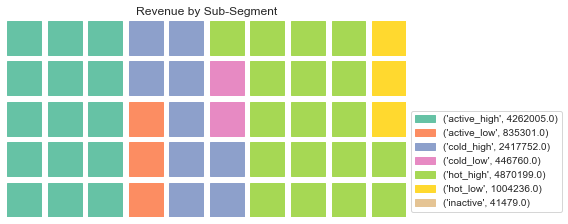

In [132]:
# Total revenue by sub-segment
plot_waffle_chart(customersegment, 'total_payment', 'sum','Revenue by Sub-Segment')

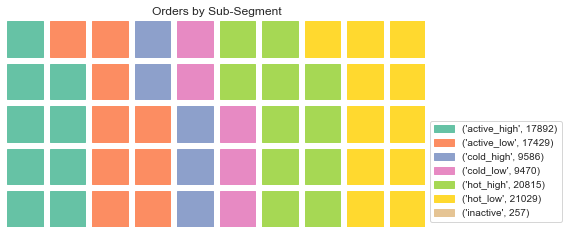

In [133]:
# Total orders placed by sub-segment
plot_waffle_chart(customersegment, 'frequency', 'sum', 'Orders by Sub-Segment')

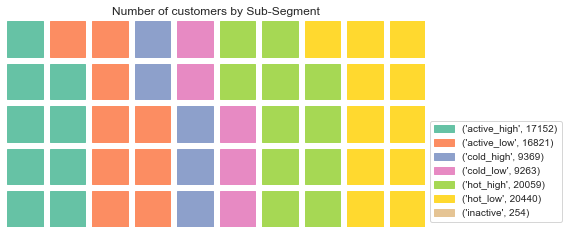

In [134]:
# Number of customers per sub-segment
plot_waffle_chart(customersegment,'customer_unique_id', 'count', 'Number of customers by Sub-Segment')

### Conclusion:
The strongest class of the 7 generated sub-segments is “high-spending active” customers, followed by “high-spending hot” customers.

“Active” customers with high and low spending have the most revenue, followed by “hot” customers.

Active customers are the biggest groups in terms of head count.

Inactive customers represent in each chart the smallest proportion.

In [135]:
#Export dataframe for downstream analysis
customersegment.to_csv('C:/Users/lenovo/Desktop/Ecommerce BI/segmented_customers.csv')